<h2>Task1 : Prediction using Supervised ML</h2><br><br>
   <b> THE SPARK FOUNDATION INTERNSHIP<br>GRIPJUN23<br><br>
    Author: Narendra Chatterjee
</b>

<h2>Problem Statement</h2><br>To predict the percentage of an student based on the no. of study hours.

<h2>To Predict</h2><br>The score if a student studies for 9.25 hrs/day?

<h2>1) Importing Lib

In [1]:
#importing all required libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


<h2>2) Reading the data

In [2]:
#importing the data
df = pd.read_csv("http://bit.ly/w-data")
print ("Data Imported")

df.head

Data Imported


<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

<h2>3) Data Cleaning

Checking for null values

In [3]:
#check if any cell is blank in the dataset
df.isnull == True

False

Analysis : No Null value spotted in the dataset

<h2>4) EDA or Exploratory Data Analysis

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


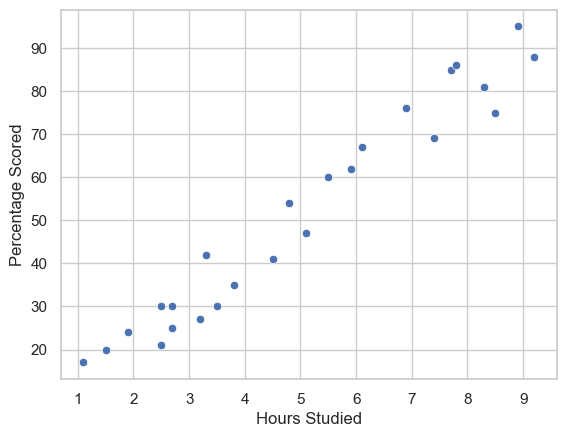

In [6]:
#Visualizing data into scatter plot
sns.set(style='whitegrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

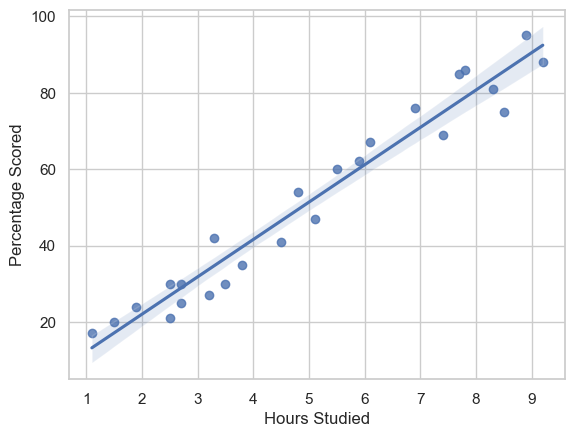

In [7]:
#Adding a regression line
sns.regplot(y= df['Scores'], x= df['Hours'])
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

In [8]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


<h2>5) Data Preparation

In [9]:
#Splitting the data into Attributes(Input) and Labels(Output)
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [10]:
#Splitting the data into Training and Testing Sets
trainX, testX, trainY, testY = train_test_split(X, Y,test_size=0.2, random_state = 0)

In [11]:
print("trainX.shape", trainX.shape)
print("trainY.shape",trainY.shape)

print("testX.shape", testX.shape)
print("testY.shape",testY.shape)

trainX.shape (20, 1)
trainY.shape (20,)
testX.shape (5, 1)
testY.shape (5,)


<h2>6) Linear Regression : Training the Algorithm

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(trainX, trainY)
print("Model Trained")

Model Trained


In [14]:
lr.coef_ 

array([9.91065648])

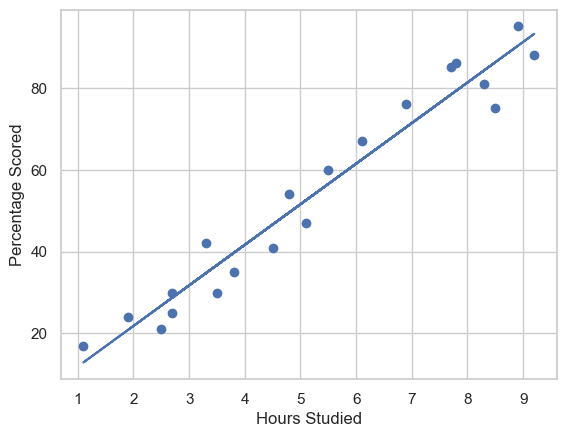

In [15]:
#using the line formula (y=m*x+c) to compute the regression line. where m = coeff of Linear Regression, x is value of X trained
#and c is the interecept

regressionLine = lr.coef_ * trainX + lr.intercept_         

plt.scatter(trainX, trainY)
plt.plot(trainX, regressionLine)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

<h2>7) Making Predictions

In [16]:
predict = lr.predict(testX)

In [17]:
list(zip(testY, predict))

[(20, 16.884144762398037),
 (27, 33.73226077948984),
 (69, 75.35701799818723),
 (30, 26.794801243040276),
 (62, 60.491033277223885)]

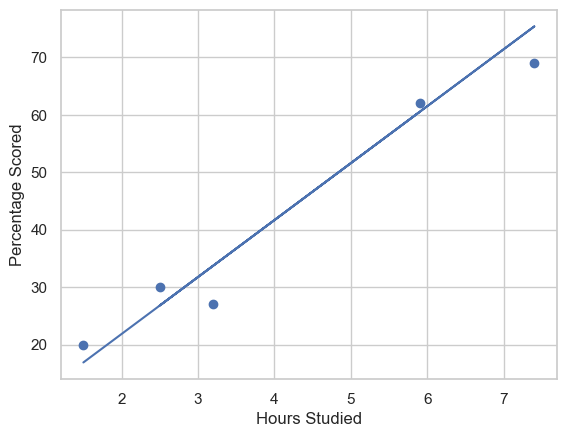

In [18]:
plt.scatter(testX, testY)
plt.plot(testX, predict)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

<h2>7) Predicted Score if student studies for 9.25hr/day

In [19]:
hr = [9.25]
predictedScore = lr.predict([hr])
print("Predicted Score if student studies for ", hr," hrs : ",predictedScore)

Predicted Score if student studies for  [9.25]  hrs :  [93.69173249]


In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(testY, predict)) 

Mean Absolute Error: 4.183859899002975
